In [1]:
import mglearn
import numpy as np

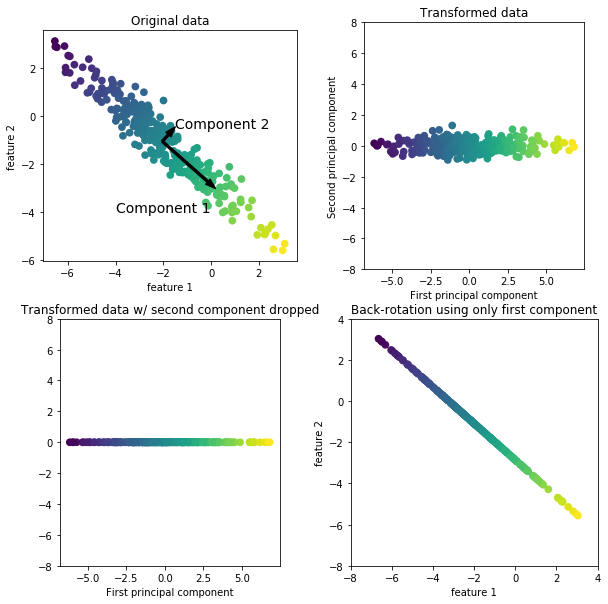

In [2]:
mglearn.plots.plot_pca_illustration()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape)
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

(569, 30)


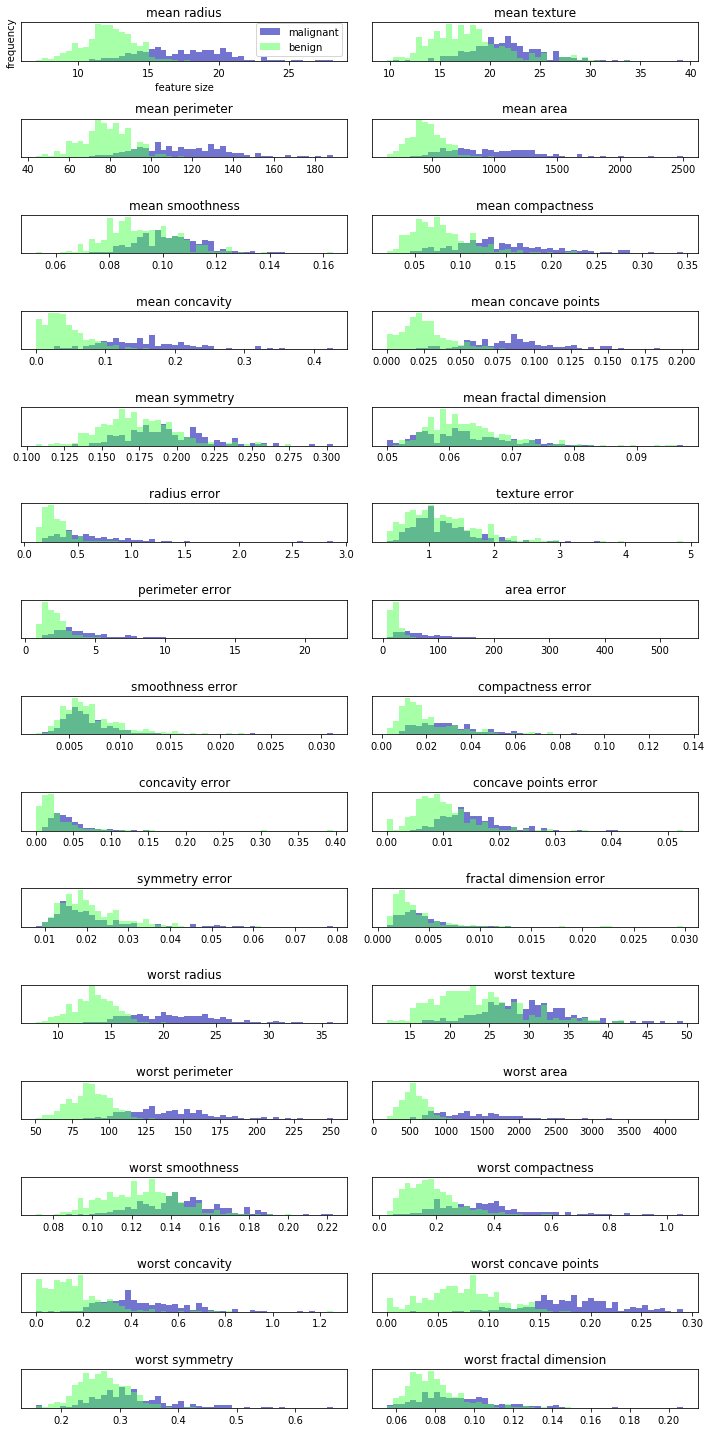

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.55)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('feature size')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [13]:
print(X_scaled[0,:])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(' : {}'.format(X_scaled.shape))
print(' : {}'.format(X_pca.shape))

 : (569, 30)
 : (569, 2)


In [18]:
print(X_pca)

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


Text(0, 0.5, 'second pca')

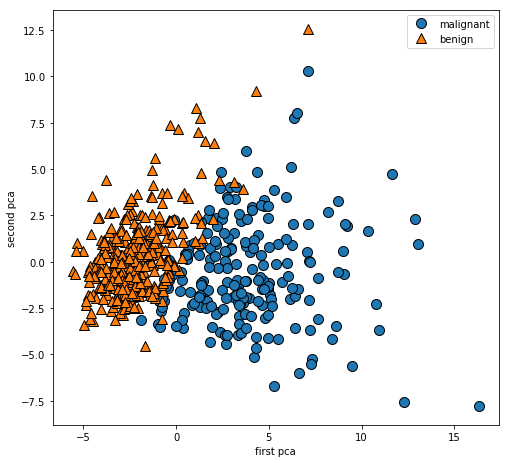

In [16]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['malignant', 'benign'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('first pca')
plt.ylabel('second pca')

In [54]:
# 주성분분석 유무에 따른 로지스틱 회귀분석 정확도 확인
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target,
                                                    test_size=0.3)
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

logmodel_pca = LogisticRegression()
logmodel_all = LogisticRegression()

logmodel_pca.fit(X_train_pca, y_train)
logmodel_all.fit(X_train, y_train)

#preds = logmodel.predict(X_test_pca)
#preds2 = logmodel2.predict(X_test)
score_pca = logmodel_pca.score(X_test_pca, y_test)
score_all = logmodel_all.score(X_test, y_test)

print('주성분분석 결과:', score_pca)
print('전체데이터 결과:', score_all)

주성분분석 결과: 0.9532163742690059
전체데이터 결과: 0.9707602339181286


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### iris

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

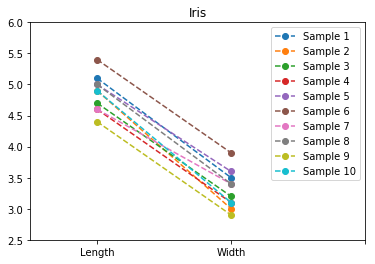

In [20]:
iris = load_iris()
N = 10
X = iris.data[:N, :2]

plt.plot(X.T,'o--')
plt.xticks(range(4), ['Length', 'Width'])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title('Iris')
plt.legend(['Sample {}'.format(i + 1) for i in range(N)])
plt.show()

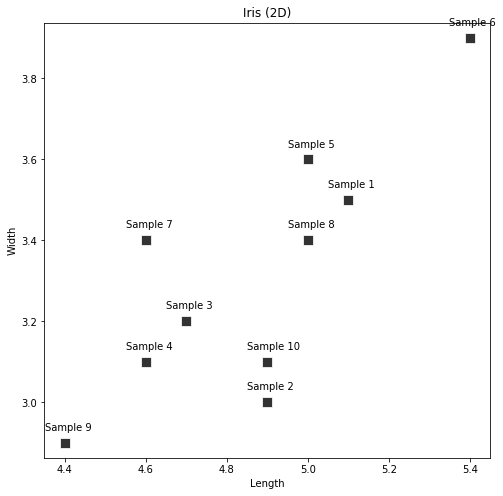

In [55]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, \
color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "Sample {}".\
        format(i + 1))
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Iris (2D)")
plt.axis("equal")
plt.show()

In [56]:
pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

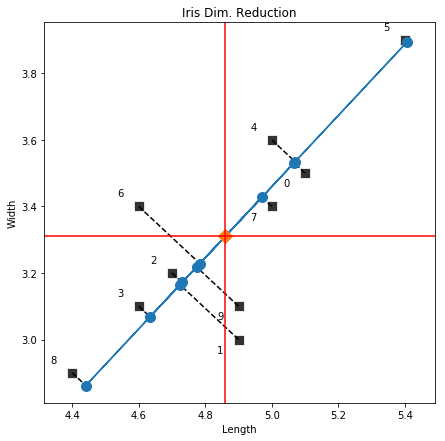

In [57]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", \
marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "{}".format(i))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Iris Dim. Reduction")
plt.axis("equal")
plt.show()

In [58]:
X = iris.data[:, [2,3]] #2,3
Y = iris.target

In [59]:
NUM = 100
select = np.random.permutation(150)
Xtr, Ytr = X[select[:NUM]], Y[select[:NUM]]
Xte, Yte = X[select[NUM:]], Y[select[NUM:]]
print(Xtr.shape)
print(Xte.shape)

(100, 2)
(50, 2)


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xtr)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
def prn_pca(pca):
    print('Components, Ratio, Eigen Value, Singular Value')
    for c,r,e,s in zip(pca.components_, pca.explained_variance_ratio_, \
                        pca.explained_variance_, pca.singular_values_):
        print('%s, %.3f, %.3f, %.3f' % (c, r, e, s))

In [62]:
prn_pca(pca)

Components, Ratio, Eigen Value, Singular Value
[0.92016195 0.39153797], 0.989, 3.500, 18.614
[-0.39153797  0.92016195], 0.011, 0.040, 1.999


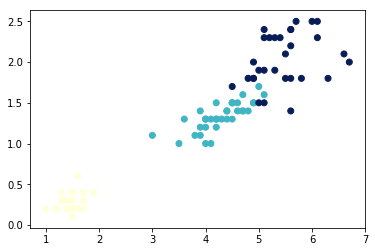

In [63]:
plt.scatter(Xtr[:, 0], Xtr[:, 1], c=Ytr, cmap='YlGnBu')

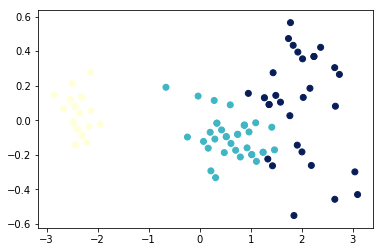

In [64]:
Xtr2 = pca.transform(Xtr)
plt.scatter(Xtr2[:, 0], Xtr2[:, 1], c=Ytr, cmap='YlGnBu')

### face

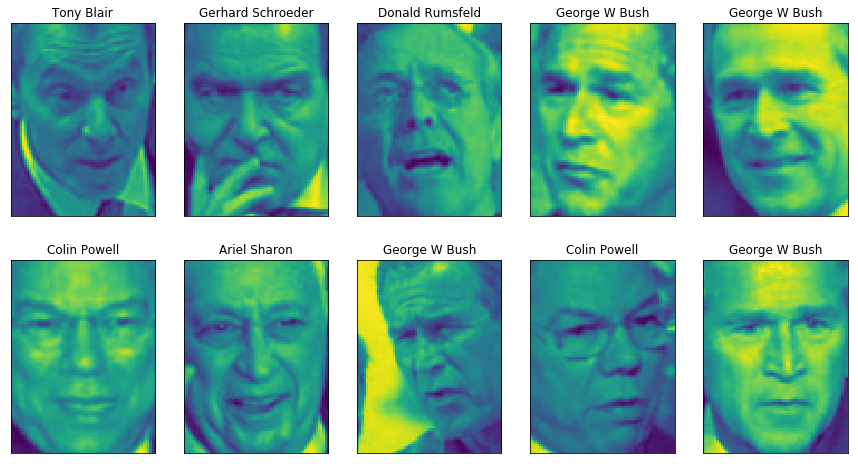

In [65]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=50,resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [66]:
print(image_shape)

(87, 65)


In [67]:
print(people.images[0])

[[ 79.        83.333336  89.       ...  68.333336  74.666664  76.      ]
 [ 85.        82.666664  90.666664 ...  58.        73.        80.666664]
 [ 88.333336  88.333336  95.       ...  47.333332  64.333336  78.      ]
 ...
 [ 47.666668  49.        48.333332 ... 143.       115.        89.      ]
 [ 47.666668  48.        47.333332 ... 149.       136.33333  102.666664]
 [ 45.666668  48.        47.       ... 153.33333  145.33333  113.333336]]


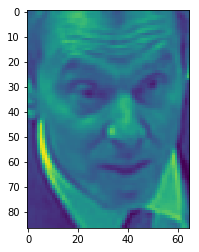

In [68]:
plt.imshow(people.images[0])

In [69]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([11,  4,  2,  3,  3,  1,  0,  3,  1,  3], dtype=int64),
 array(['Tony Blair', 'Gerhard Schroeder', 'Donald Rumsfeld',
        'George W Bush', 'George W Bush', 'Colin Powell', 'Ariel Sharon',
        'George W Bush', 'Colin Powell', 'George W Bush'], dtype='<U17'))

In [70]:
print("people.images.shape: {}".format(people.images.shape))
print(" : {}".format(len(people.target_names)))

people.images.shape: (1560, 87, 65)
 : 12


In [71]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Ariel Sharon               77 Colin Powell              236 Donald Rumsfeld           121 
George W Bush             530 Gerhard Schroeder         109 Hugo Chavez                71 
Jacques Chirac             52 Jean Chretien              55 John Ashcroft              53 
Junichiro Koizumi          60 Serena Williams            52 Tony Blair                144 


In [73]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [74]:
from sklearn.neighbors import KNeighborsClassifier
#
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1- : {:.2f}".\
format(knn.score(X_test, y_test)))

1- : 0.37


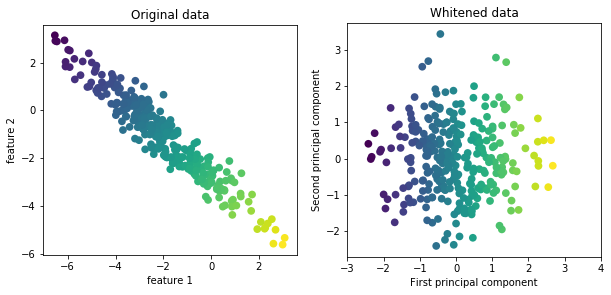

In [75]:
mglearn.plots.plot_pca_whitening()

In [77]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (450, 100)


In [78]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(" : {:.2f}".format(knn.score(X_test_pca, y_test)))

 : 0.43


In [79]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)
